# Proyecto: Predicción de Cancelación de Clientes en Model Fitness

## Introducción


Model Fitness es una cadena de gimnasios que está desarrollando una estrategia basada en datos para mejorar la retención de clientes. En el ámbito de los gimnasios, uno de los desafíos más comunes es la cancelación de membresías por parte de los clientes. Algunos clientes pueden cancelar de manera explícita, mientras que otros simplemente dejan de asistir sin formalizar la cancelación, lo que puede pasar desapercibido si no se monitorea de manera adecuada.


El objetivo de este proyecto es desarrollar un modelo de predicción de la probabilidad de cancelación de clientes para el mes siguiente. Además, se realizará un análisis de los factores que influyen en la cancelación, se identificarán grupos de clientes con diferentes tasas de cancelación y se propondrán estrategias para reducir la rotación.


Los pasos principales que seguiremos en este proyecto incluyen:

1. Realizar un Análisis Exploratorio de Datos (EDA) para comprender mejor las características del dataset y observar patrones en los datos.
2. Construir un modelo de predicción para estimar la probabilidad de cancelación utilizando técnicas como la regresión logística y los bosques aleatorios.
3. Realizar un análisis de clustering para identificar diferentes grupos de clientes según su comportamiento y características.
4. Extraer conclusiones y recomendaciones para mejorar la retención de clientes con base en los análisis realizados.


Este análisis ayudará a Model Fitness a identificar a tiempo a los clientes que corren riesgo de cancelar sus membresías, permitiendo la implementación de acciones preventivas.



## Cargar los datos y explorarlos
### Importar las librerias necesarias

In [1]:
# Importar las librerias necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

### Cargar el dataset

In [2]:
# Cargar el dataset
data = pd.read_csv('/datasets/gym_churn_us.csv')

# Mostrar las primeras filas del dataset
data.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


## Análisis exploratorio de datos (EDA)
### Información del dataset

In [3]:
# Mostrar la información del dataset (columnas, tipos de datos, valores nulos)
data.info()

# Mostrar estadísticas descriptivas
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


__Descripción del Dataset__


El dataset contiene información sobre 4000 clientes del gimnasio, con 14 columnas que incluyen características como género, edad, duración del contrato, frecuencia de visitas, y si el cliente canceló la membresía (variable `Churn`). Los datos están completos, ya que no hay valores faltantes.

__Estadísticas Descriptivas__
- __Promedio de Edad:__ La edad promedio de los usuarios es de 29 años, con una desviación estándar de 3.26 años. La edad mínima es 18 y la máxima es 41 años.
- __Duración del Contrato:__ La duración del contrato promedio es de aproximadamente 4.68 meses, lo que sugiere que la mayoría de los clientes eligen contratos a corto plazo.
- __Frecuencia de Clases:__ La frecuencia media total de clases por semana es de 1.87 visitas, y la frecuencia media de visitas en el mes actual es de 1.76. Esto indica que los usuarios suelen visitar el gimnasio entre una y dos veces por semana.
- __Gastos Adicionales:__ El gasto adicional promedio en servicios complementarios es de 146.94 unidades monetarias, con una gran dispersión (desviación estándar de 96.36), lo que indica que algunos usuarios gastan significativamente más que otros.
- __Cancelación de Membresía:__ Aproximadamente el 26.5% de los usuarios (Churn = 1) cancelaron su membresía durante el mes en cuestión.

### Comparar características entre clientes que se fueron y los que se quedaron

In [4]:
# Agrupar los datos por la columna 'Churn' (cancelación)
grouped_data = data.groupby('Churn').mean()

# Mostrar los valores promedio para cada grupo (clientes que se fueron vs los que se quedaron)
grouped_data

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


La tabla resultante muestra los valores promedio de varias características para dos grupos de clientes: aquellos que se fueron (`Churn = 1`) y aquellos que se quedaron (`Churn = 0`).

- __Edad:__ Los clientes que se fueron son más jóvenes en promedio (27 años) comparado con los que se quedaron (30 años).

- __Tiempo de Contrato:__ Los clientes que se quedaron tienen un contrato más largo (5.75 meses) en comparación con los que se fueron (1.73 meses).

- __Frecuencia de Clases:__ Los clientes que se quedaron tienen una frecuencia de clases promedio más alta en total (5.28) y en el mes actual (4.71) en comparación con los que se fueron (1.66 y 0.99, respectivamente).

- __Ubicación y Género:__ No hay una gran diferencia en la proporción de género y ubicación entre los dos grupos. La proporción de clientes que viven cerca de la ubicación de la empresa es similar en ambos grupos. También hay una proporción similar de géneros entre los que se quedaron y los que se fueron.

- __Contrato y Socios:__ Los clientes que se quedaron tienen una mayor proporción de contratos más largos y la mayoría parece tener un socio (`Partner` y `Promo_friends`). En contraste, los clientes que se fueron tienen un promedio menor en estas características.

- __Cargos Adicionales:__ Los clientes que se quedaron tienen un promedio más alto en cargos adicionales totales (`Avg_additional_charges_total`) en comparación con los que se fueron.

- __Visitas al Grupo:__ Los clientes que se quedaron tienen un promedio más alto de visitas al grupo (`Group_visits`) en comparación con los que se fueron.

- __Duración del Contrato:__ La duración restante del contrato (`Month_to_end_contract`) es mayor para los clientes que se quedaron, mientras que es significativamente menor para los que se fueron.

### Histogramas de barras y distribuciones de características

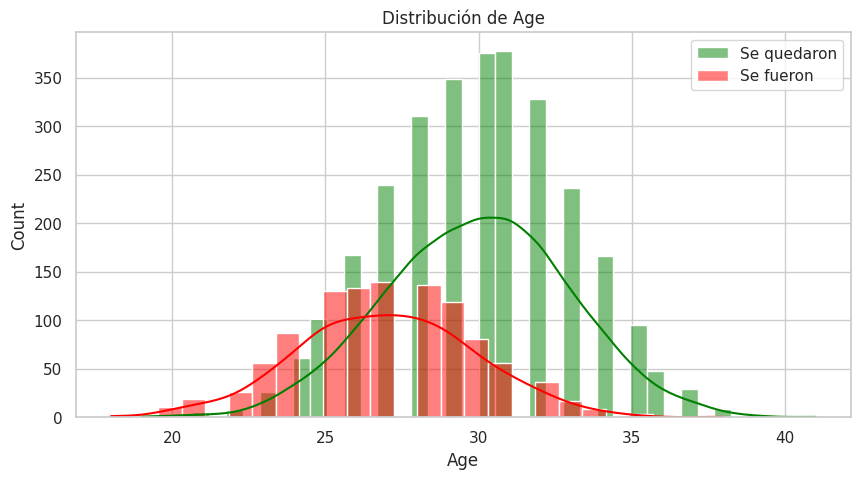

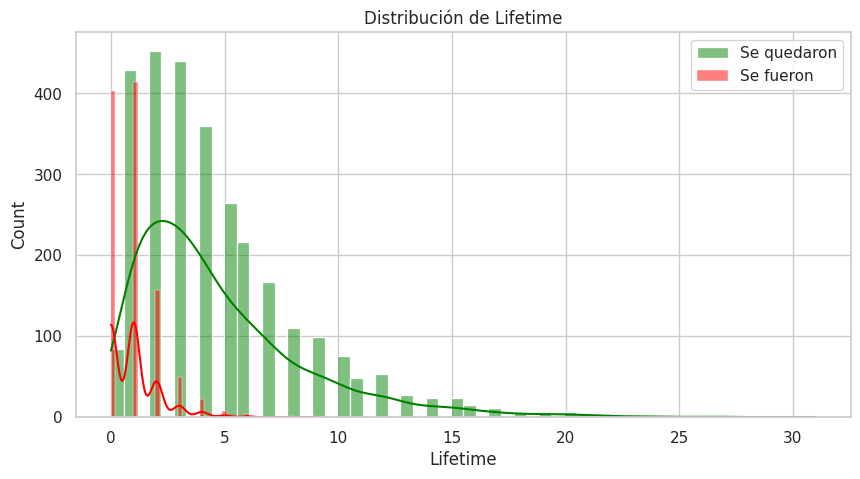

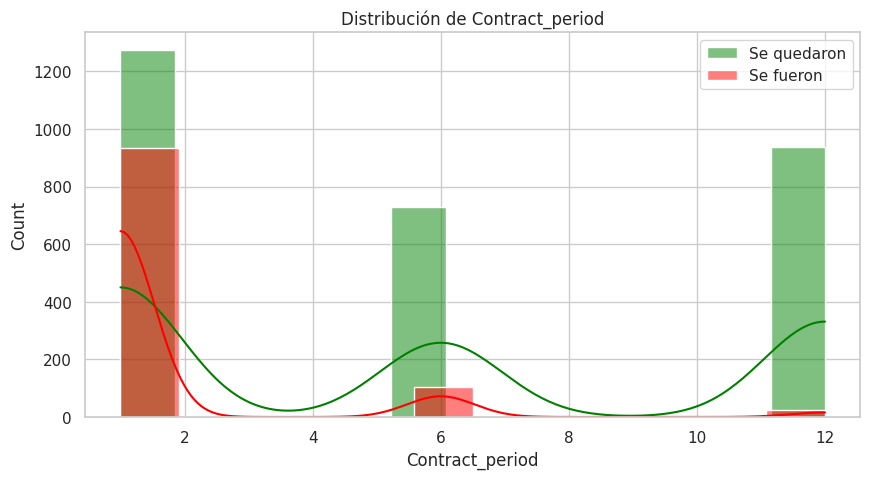

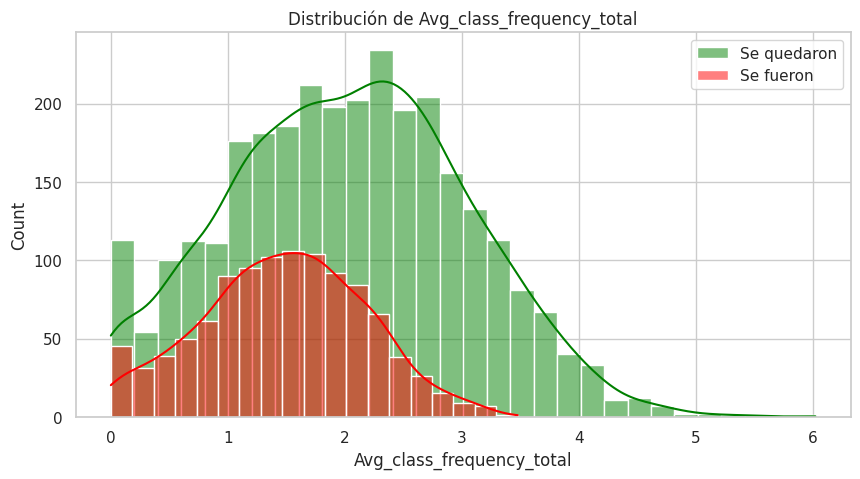

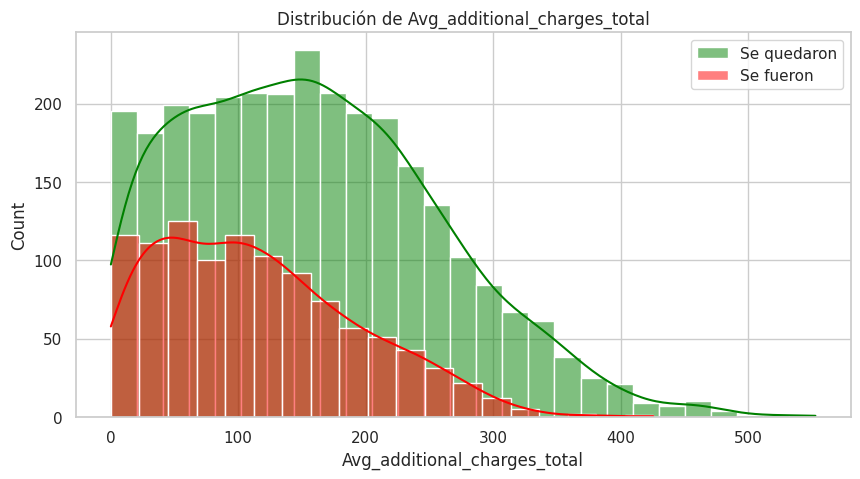

In [5]:
# Establecer el estilo de los gráficos
sns.set(style="whitegrid")

# Crear histogramas para comparar características
features = ['Age', 'Lifetime', 'Contract_period', 'Avg_class_frequency_total', 'Avg_additional_charges_total']

for feature in features:
    plt.figure(figsize=(10, 5))
    sns.histplot(data[data['Churn'] == 0][feature], color='green', label='Se quedaron', kde=True)
    sns.histplot(data[data['Churn'] == 1][feature], color='red', label='Se fueron', kde=True)
    plt.title(f'Distribución de {feature}')
    plt.legend()
    plt.show()

__Comparación entre Clientes que Cancelaron y los que se Quedaron__

- __Ubicación Cercana (`Near_Location`):__ El 87.3% de los clientes que se quedaron vivían o trabajaban cerca del gimnasio, mientras que solo el 76.8% de los que cancelaron lo hacían. Esto sugiere que la proximidad al gimnasio influye positivamente en la retención.

- __Afiliación a Empresas (`Partner`):__ El 53.4% de los clientes que se quedaron estaban afiliados a empresas asociadas, en comparación con solo el 35.5% de los que cancelaron. Las afiliaciones corporativas parecen fomentar la permanencia en el gimnasio.

- __Promociones con Amigos (`Promo_friends`):__ El 35.3% de los que se quedaron utilizaron la promoción de "traer a un amigo", en comparación con solo el 18.4% de los que cancelaron. Las promociones que fomentan las inscripciones en grupo también podrían estar asociadas a una mayor retención.

- __Duración del Contrato (`Contract_period`):__ Los clientes que se quedaron tenían una duración media de contrato de 5.74 meses, mientras que los que cancelaron tenían contratos mucho más cortos, con una media de solo 1.73 meses. Esto destaca que los contratos más largos están asociados con una menor tasa de cancelación.

- __Visitas Grupales (`Group_visits`):__ El 46.4% de los clientes que se quedaron participaban en visitas grupales, frente al 26.9% de los que cancelaron. La participación en actividades grupales también parece ser un factor relevante para la retención.

- __Edad:__ Los clientes que se quedaron tenían una media de 29.97 años, mientras que los que cancelaron eran más jóvenes, con una media de 26.99 años. Los usuarios más jóvenes parecen tener una mayor tendencia a cancelar su membresía.

- __Gastos Adicionales (`Avg_additional_charges_total`):__ Los que se quedaron gastaron en promedio 158.45 en servicios adicionales, mientras que los que cancelaron gastaron solo 115.08. Gastar más en servicios adicionales parece estar relacionado con una mayor retención.

- __Meses Restantes del Contrato (`Month_to_end_contract`):__ Los clientes que se quedaron tenían más tiempo restante en sus contratos (5.28 meses) en comparación con los que cancelaron (1.66 meses). Esto sugiere que los usuarios con contratos cercanos a la expiración tienen más probabilidades de cancelar.

- __Frecuencia de Visitas (`Avg_class_frequency_total` y `Avg_class_frequency_current_month`):__ Los clientes que se quedaron visitaban el gimnasio más frecuentemente tanto a lo largo de su membresía (2.02 visitas por semana) como en el mes actual (2.02 visitas), en comparación con los que cancelaron, quienes tenían una frecuencia mucho menor (1.47 visitas a lo largo de su membresía y 1.04 visitas en el mes actual).

### Matriz de correlación

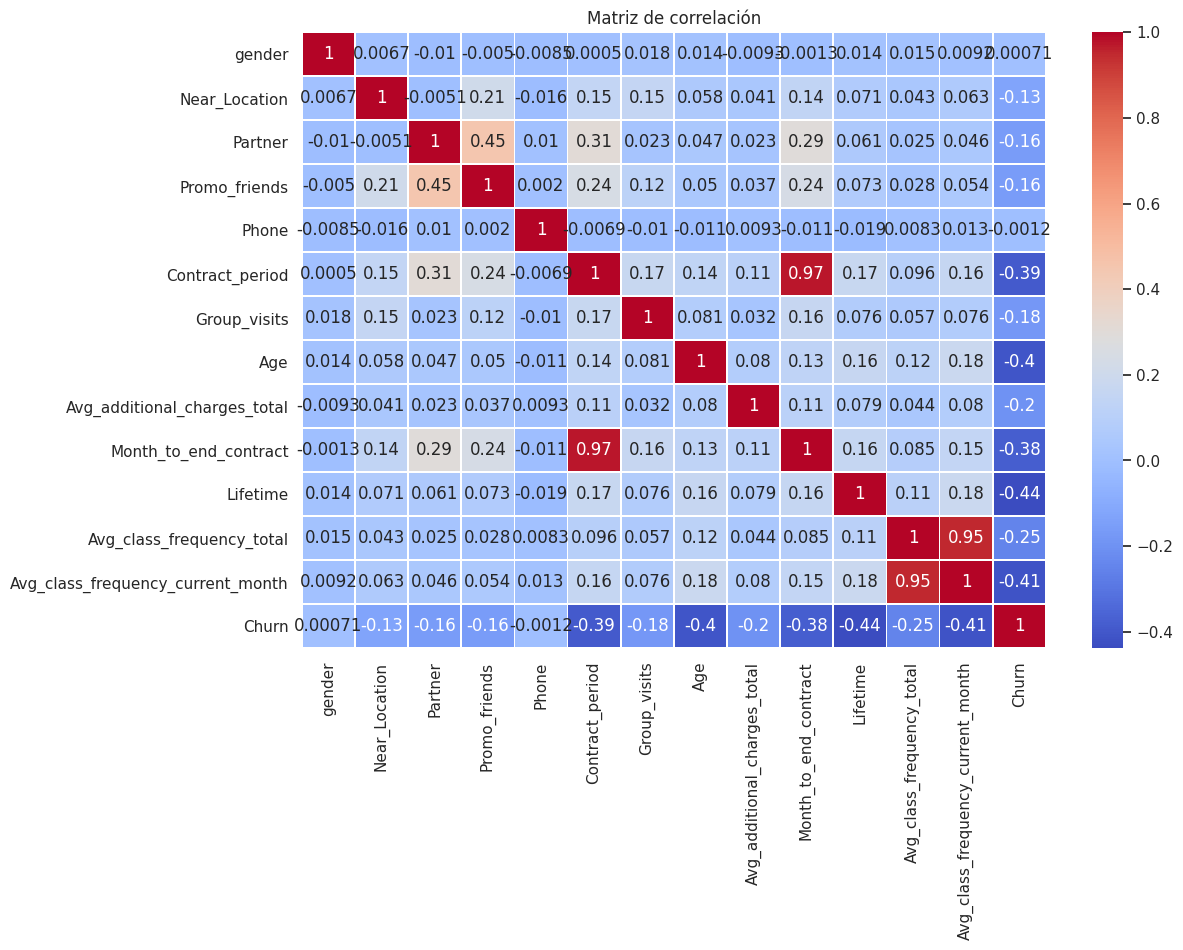

In [6]:
# Crear una matriz de correlación
corr_matrix = data.corr()

# Mostrar la matriz de correlación utilizando un mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de correlación')
plt.show()

__Matriz de correlación__

- __`Month_to_end_contract:`__ Cuanto menos tiempo queda para que finalice el contrato, mayor es la probabilidad de cancelación. Esta es una relación intuitiva y esperada.

- __`Avg_class_frequency_total y |Avg_class_frequency_current_month:`__ Una baja frecuencia de clases se asocia fuertemente con la cancelación. Esto sugiere que los clientes que no utilizan activamente los servicios del gimnasio son más propensos a darse de baja.

- __`Lifetime:`__ Los clientes con una vida útil más corta (menos tiempo como miembros) tienen una mayor probabilidad de cancelar. Esto indica que la retención de clientes a largo plazo es un desafío importante.

- __`Promo_friends y Partner:`__ Estas variables tienen una correlación positiva con Churn. Esto podría indicar que los clientes que se inscribieron a través de promociones o que tienen un compañero también son más propensos a cancelar.

- __`Contract_period y Month_to_end_contract:`__ Existe una fuerte correlación negativa entre estas dos variables, lo que es lógico, ya que a medida que pasa el tiempo, el mes de finalización del contrato se acerca.

- __`Age y Churn:`__ Existe una correlación negativa débil entre la edad y la cancelación. Esto sugiere que los clientes más jóvenes podrían ser más propensos a cancelar sus membresías.

La matriz de correlación proporciona una visión general de las relaciones entre las variables y sugiere que factores como la duración del contrato, la frecuencia de uso y la edad del cliente están fuertemente asociados con la cancelación. Al abordar estos factores, Model Fitness puede desarrollar una estrategia de retención más efectiva y aumentar la satisfacción del cliente.

## Construir un modelo para predecir la cancelación de usuarios
### Preparación de los datos y división en conjuntos de entrenamiento y validación

In [7]:
# Definir las características (X) y la variable objetivo (y)
X = data.drop(columns='Churn')
y = data['Churn']

# Definir las características (X) y la variable objetivo (y)
X = data.drop(columns='Churn')
y = data['Churn']

# Identificar las columnas numéricas
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns

# Identificar las columnas binarias
binary_features = X.select_dtypes(include=['uint8']).columns

# Dividir los datos en entrenamiento y validación (80% - 20%)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar las características numéricas
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_val_scaled = X_val.copy()

X_train_scaled[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_val_scaled[numeric_features] = scaler.transform(X_val[numeric_features])

### Entrenar el modelo de regresión logística

In [8]:
# Crear y entrenar el modelo de regresión logística
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)

# Hacer predicciones en el conjunto de validación
y_pred_log = log_reg.predict(X_val_scaled)

### Modelo de Bosque Aleatorio

In [9]:
# Crear y entrenar el modelo de bosque aleatorio
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de validación
y_pred_rf = rf_model.predict(X_val)

### Evaluación de los Modelos

In [10]:
# Evaluar el modelo de regresión logística
accuracy_log = accuracy_score(y_val, y_pred_log)
precision_log = precision_score(y_val, y_pred_log)
recall_log = recall_score(y_val, y_pred_log)

# Evaluar el modelo de bosque aleatorio
accuracy_rf = accuracy_score(y_val, y_pred_rf)
precision_rf = precision_score(y_val, y_pred_rf)
recall_rf = recall_score(y_val, y_pred_rf)

# Imprimir los resultados
print("Regresión Logística:")
print(f"Exactitud: {accuracy_log:.2f}, Precisión: {precision_log:.2f}, Recall: {recall_log:.2f}")

print("\nBosque Aleatorio:")
print(f"Exactitud: {accuracy_rf:.2f}, Precisión: {precision_rf:.2f}, Recall: {recall_rf:.2f}")

Regresión Logística:
Exactitud: 0.92, Precisión: 0.87, Recall: 0.78

Bosque Aleatorio:
Exactitud: 0.91, Precisión: 0.85, Recall: 0.78


- Ambos modelos muestran un rendimiento similar. La regresión logística tiene una leve ventaja en términos de exactitud y precisión, lo que la hace ligeramente mejor en predecir cancelaciones de usuarios con más acierto cuando las identifica.

- El bosque aleatorio ofrece resultados muy cercanos, con un recall igual, pero con una precisión ligeramente inferior.

Si se necesita un modelo más simple y eficiente, la regresión logística podría ser la mejor opción.

## Crear clústeres de usuarios/as
### Estandarización de los datos

Para comenzar, necesitamos estandarizar los datos, dejando de lado la columna `Churn`, ya que no es relevante para la creación de clústeres.

In [11]:
# Eliminar la columna 'Churn'
X_clustering = data.drop(columns='Churn')

# Estandarizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clustering)

### Creación del dendrograma con linkage()

Para crear la matriz de distancias y el dendrograma, utilizaremos la función `linkage()` de SciPy. Esto nos ayudará a visualizar los posibles clústeres.

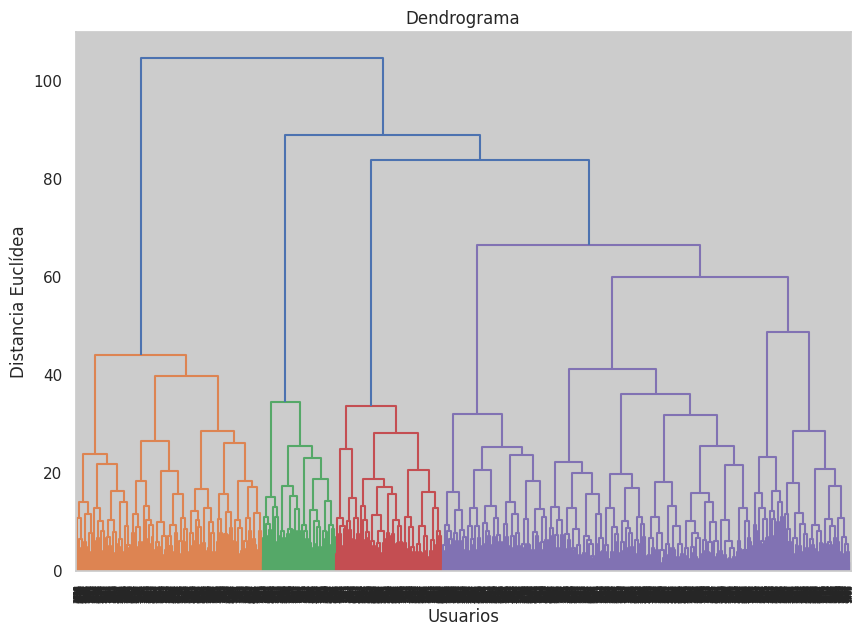

In [12]:
# Crear la matriz de distancias
linked = sch.linkage(X_scaled, method='ward')

# Graficar el dendrograma
plt.figure(figsize=(10, 7))
sch.dendrogram(linked)
plt.title('Dendrograma')
plt.xlabel('Usuarios')
plt.ylabel('Distancia Euclídea')
plt.show()

### Clustering con K-means

Después de estimar el número de clústeres, entrenamos el modelo de clustering K-means con el número de clústeres `n=5`.

In [13]:
# Definir el número de clústeres
n_clusters = 5

# Entrenar el modelo de K-means
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Agregar los clústeres al dataframe original
data['cluster'] = clusters

### Valores medios de características por clúster

Vamos a observar los valores medios de cada característica por clúster para identificar patrones o diferencias entre los grupos.


In [14]:
# Calcular los valores medios de cada característica por clúster
cluster_means = data.groupby('cluster').mean()
print(cluster_means)

           gender  Near_Location   Partner  Promo_friends  Phone  \
cluster                                                            
0        0.502370       0.949447  0.829384       0.998420    1.0   
1        0.554556       0.849269  0.263217       0.052868    1.0   
2        0.499422       0.937572  0.737572       0.478613    1.0   
3        0.485738       0.718011  0.299919       0.018745    1.0   
4        0.523316       0.862694  0.471503       0.305699    0.0   

         Contract_period  Group_visits        Age  \
cluster                                             
0               3.097946      0.448657  29.104265   
1               2.606299      0.436445  30.008999   
2              11.854335      0.546821  29.905202   
3               1.914425      0.276284  28.083945   
4               4.777202      0.427461  29.297927   

         Avg_additional_charges_total  Month_to_end_contract  Lifetime  \
cluster                                                                  
0  

### Distribuciones de características por clúster

Para visualizar las distribuciones de características por clúster, podemos trazar histogramas o gráficos de densidad. Aquí te doy un ejemplo usando histogramas para una de las características.

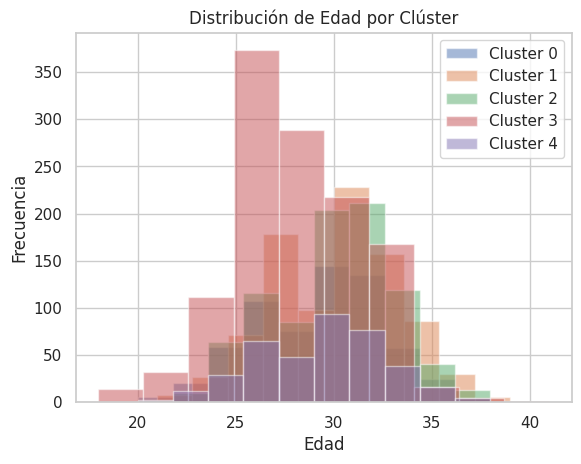

In [15]:
# Graficar la distribución de una característica para cada clúster (por ejemplo, 'Age')
for cluster in range(n_clusters):
    plt.hist(data[data['cluster'] == cluster]['Age'], alpha=0.5, label=f'Cluster {cluster}')
plt.title('Distribución de Edad por Clúster')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

### Tasa de cancelación por clúster

Para cada clúster, calcularemos la tasa de cancelación (usuarios que se fueron frente a los que permanecen).

In [16]:
# Calcular la tasa de cancelación por clúster
churn_rate_by_cluster = data.groupby('cluster')['Churn'].mean()
print(churn_rate_by_cluster)

cluster
0    0.246445
1    0.089989
2    0.021965
3    0.572942
4    0.266839
Name: Churn, dtype: float64


__Análisis__

- Clusters 1 y 2 son los más leales, especialmente el cluster 2, con la mayor duración de contrato y la menor tasa de cancelación.
- Cluster 3 necesita atención inmediata, ya que su tasa de cancelación es extremadamente alta. Mejorar la retención de estos usuarios/as debería ser una prioridad, posiblemente incentivando el uso del servicio a través de promociones o mejora en la experiencia del cliente.
- Cluster 0 y Cluster 4 presentan oportunidades de mejora. Aunque no tienen tasas de cancelación tan altas como el cluster 3, podrían beneficiarse de estrategias para aumentar su participación, como incrementar la frecuencia de uso o mejorar los servicios que reciben.

## Conclusiones y Recomendaciones

1. Se identificaron varias diferencias notables entre los clientes que cancelaron y los que continuaron con su membresía:

- __Proximidad al gimnasio:__ Los clientes que viven cerca tienen más probabilidades de continuar.
- __Afiliaciones corporativas:__ Los clientes con contratos a través de empresas tienen mayor retención.
- __Promociones de amigos:__ Los usuarios que aprovecharon promociones para inscribir a amigos tienen más probabilidades de quedarse.
- __Duración del contrato:__ Los contratos más largos están claramente asociados con una menor tasa de cancelación.
- __Edad:__ Los clientes más jóvenes tienden a cancelar más a menudo.
- __Frecuencia de visitas:__ Los usuarios con una mayor frecuencia de visitas son menos propensos a cancelar.

2. Se construyeron dos modelos de predicción para estimar la probabilidad de cancelación:

- __Regresión Logística__
  - Exactitud: 0.92
  - Precisión: 0.87
  - Recall: 0.78
- __Bosque Aleatorio__
  - Exactitud: 0.91
  - Precisión: 0.85
  - Recall: 0.78
  
Ambos modelos tienen un rendimiento similar, con la regresión logística mostrando una leve ventaja en precisión y exactitud. Si se busca un modelo eficiente y simple, la regresión logística podría ser la mejor opción.

3. Se aplicó un análisis de clústeres para identificar diferentes grupos de clientes basados en su comportamiento y características. Esto permitió identificar cinco clústeres con patrones distintivos:

- __Clúster 1 y 2:__ Los clientes más leales, especialmente el clúster 2, con contratos más largos y una tasa de cancelación muy baja.
- __Clúster 3:__ Necesita atención inmediata, ya que su tasa de cancelación es la más alta. Se recomienda enfocarse en estos usuarios a través de promociones e incentivos.
- __Clúster 0 y 4:__ Aunque no presentan una tasa de cancelación tan alta como el clúster 3, podrían beneficiarse de estrategias para aumentar su participación, como promociones o mejora de la experiencia.

__Recomendaciones__

- __Optimizar contratos:__ Ofrecer incentivos para que los clientes opten por contratos más largos podría reducir significativamente la tasa de cancelación.
- __Programas corporativos y promociones grupales:__ Fortalecer las afiliaciones a empresas y las promociones de traer a un amigo son estrategias efectivas para aumentar la retención.
- __Atención a usuarios jóvenes:__ Dado que los usuarios más jóvenes tienden a cancelar más, se podrían ofrecer programas específicos que mejoren la experiencia para este grupo.
- __Incentivar la frecuencia de uso:__ Programas que aumenten la frecuencia de visitas, como clases exclusivas o promociones, podrían ser clave para reducir el churn.